In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def percentage_difference(col1,col2):
    return (abs(col2 - col1) / col1) * 100

In [12]:
error = pd.DataFrame(columns=['atax','bicg','relu','fir','bitonicsort','fastwalshtransform','matrixtranspose','spmv','floydwarshall','pagerank','kmeans'])

In [13]:
atax = pd.read_csv('./outputs/atax.csv')
diff_col = percentage_difference(atax['gold_time'],atax['sim_time'])
error['atax']=diff_col
print(diff_col.mean())
total = diff_col.mean()
bicg = pd.read_csv('./outputs/bicg.csv')
diff_col = percentage_difference(bicg['gold_time'],bicg['sim_time'])
error['bicg']=diff_col
print(diff_col.mean())
total += diff_col.mean()
relu = pd.read_csv('./outputs/relu.csv')
diff_col = percentage_difference(relu['gold_time'],relu['sim_time'])
error['relu']=diff_col
print(diff_col.mean())
total += diff_col.mean()
fir = pd.read_csv('./outputs/fir.csv')
diff_col = percentage_difference(fir['gold_time'],fir['sim_time'])
error['fir']=diff_col
print(diff_col.mean())
total += diff_col.mean()
bs = pd.read_csv('./outputs/bitonicsort.csv')
diff_col = percentage_difference(bs['gold_time'],bs['sim_time'])
error['bitonicsort']=diff_col
print(diff_col.mean())
total += diff_col.mean()
fw = pd.read_csv('./outputs/fastwalshtransform.csv')
diff_col = percentage_difference(fw['gold_time'],fw['sim_time'])
error['fastwalshtransform']=diff_col
print(diff_col.mean())
total += diff_col.mean()
mt = pd.read_csv('./outputs/matrixtranspose.csv')
mt=mt.loc[mt['param1']<=3584]
diff_col = percentage_difference(mt['gold_time'],mt['sim_time'])
error['matrixtranspose']=diff_col
print(diff_col.mean())
total += diff_col.mean()
spmv = pd.read_csv('./outputs/spmv.csv')
spmv = spmv.loc[spmv['param1']<=1536]
diff_col = percentage_difference(spmv['gold_time'],spmv['sim_time'])
error['spmv']=diff_col
print(diff_col.mean())
total += diff_col.mean()
floydwarshall = pd.read_csv('./outputs/floydwarshall.csv')
diff_col = percentage_difference(floydwarshall['gold_time'],floydwarshall['sim_time'])
error['floydwarshall']=diff_col
print(diff_col.mean())
total += diff_col.mean()
pagerank = pd.read_csv('./outputs/pagerank.csv')
diff_col = percentage_difference(pagerank['gold_time'],pagerank['sim_time'])
error['pagerank']=diff_col
print(diff_col.mean())
total += diff_col.mean()
kmeans = pd.read_csv('./outputs/kmeans.csv')
diff_col = percentage_difference(kmeans['gold_time'],kmeans['sim_time'])
error['kmeans']=diff_col
print(diff_col.mean())
total += diff_col.mean()
print(total/11.0)

7.869003502545728
5.923337717377656
3.742590330387622
14.766648258603833
3.890281114799949
5.474032074218157
14.598139674586589
9.753480761462773
19.033641464456167
11.806916394768905
11.540928420929767
9.854454519467014


In [14]:
print(error)

         atax       bicg       relu        fir  bitonicsort  \
0   15.950125  20.241733   0.274725  11.263118    12.509827   
1    9.171616   9.844244   0.609756  17.444620    11.986111   
2    5.779938   6.856745   2.454853  17.007874     6.828380   
3    4.819425   3.570940   2.078652  15.610420     3.398785   
4    2.386459   0.084459   1.034858  14.557692     0.247840   
5    2.031398   0.515700   1.506696  14.244632     2.736802   
6    0.745513   0.655528   3.139140  12.405873     2.431309   
7   10.681838   8.354303   1.716738  11.143695     3.069860   
8   11.532252   8.491087   1.266164   4.358108     3.555392   
9   11.109010   8.446609   5.385375  17.717718     3.580728   
10  15.219478  12.627707   1.457976   2.951389     4.609170   
11  13.410910  11.015611   0.311634  14.014252     3.351541   
12  12.630596  10.092107   4.272772  14.976809     1.612687   
13  12.213977   9.405116   3.760016  19.238272     2.032383   
14  14.517912  11.327636   9.207819  21.119497     0.23

<AxesSubplot:>

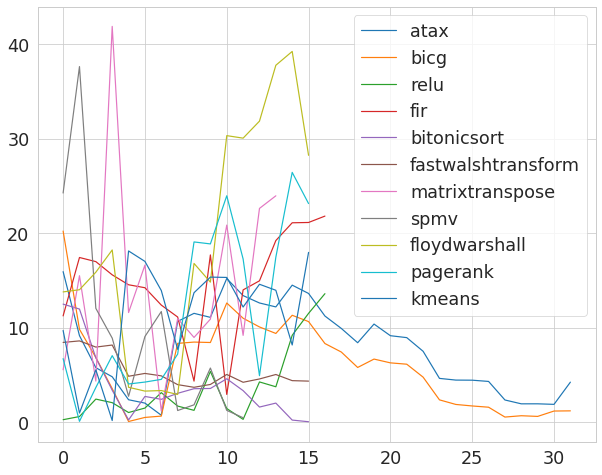

In [15]:
error.plot(figsize=(10,8))

In [16]:
atax = atax.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
atax.columns=['x','type','time']
atax

x       type      time
0     64   sim_time  0.000026
1    128   sim_time  0.000035
2    192   sim_time  0.000049
3    256   sim_time  0.000060
4    320   sim_time  0.000068
..   ...        ...       ...
59  1792  gold_time  0.000305
60  1856  gold_time  0.000315
61  1920  gold_time  0.000325
62  1984  gold_time  0.000334
63  2048  gold_time  0.000336

[64 rows x 3 columns]

In [17]:
bicg = bicg.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
bicg.columns=['x','type','time']
bicg

x       type      time
0     64   sim_time  0.000027
1    128   sim_time  0.000036
2    192   sim_time  0.000051
3    256   sim_time  0.000061
4    320   sim_time  0.000069
..   ...        ...       ...
59  1792  gold_time  0.000315
60  1856  gold_time  0.000325
61  1920  gold_time  0.000335
62  1984  gold_time  0.000346
63  2048  gold_time  0.000347

[64 rows x 3 columns]

In [18]:
relu = relu.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
relu.columns=['length','type','time']
relu

length       type      time
0        32   sim_time  0.000004
1        64   sim_time  0.000004
2       128   sim_time  0.000004
3       256   sim_time  0.000004
4       512   sim_time  0.000004
5      1024   sim_time  0.000004
6      2048   sim_time  0.000004
7      4096   sim_time  0.000004
8      8192   sim_time  0.000004
9     16384   sim_time  0.000004
10    32768   sim_time  0.000005
11    65536   sim_time  0.000006
12   131072   sim_time  0.000008
13   262144   sim_time  0.000012
14   524288   sim_time  0.000021
15  1048576   sim_time  0.000039
16  2097152   sim_time  0.000074
17       32  gold_time  0.000004
18       64  gold_time  0.000004
19      128  gold_time  0.000004
20      256  gold_time  0.000004
21      512  gold_time  0.000004
22     1024  gold_time  0.000004
23     2048  gold_time  0.000004
24     4096  gold_time  0.000004
25     8192  gold_time  0.000004
26    16384  gold_time  0.000004
27    32768  gold_time  0.000005
28    65536  gold_time  0.000006
29   131072  gold_time  0.000008
30   262144  gold_time  0.000013
31   524288  gold_time  0.000023
32  1048576  gold_time  0.000044
33  2097152  gold_time  0.000085

In [19]:
fir = fir.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
fir.columns=['length','type','time']
fir

length       type      time
0        64   sim_time  0.000006
1       128   sim_time  0.000006
2       256   sim_time  0.000006
3       512   sim_time  0.000006
4      1024   sim_time  0.000006
5      2048   sim_time  0.000006
6      4096   sim_time  0.000006
7      8192   sim_time  0.000006
8     16384   sim_time  0.000006
9     32768   sim_time  0.000009
10    65536   sim_time  0.000013
11   131072   sim_time  0.000020
12   262144   sim_time  0.000037
13   524288   sim_time  0.000068
14  1048576   sim_time  0.000130
15  2097152   sim_time  0.000257
16  4194304   sim_time  0.000507
17       64  gold_time  0.000005
18      128  gold_time  0.000005
19      256  gold_time  0.000005
20      512  gold_time  0.000005
21     1024  gold_time  0.000005
22     2048  gold_time  0.000005
23     4096  gold_time  0.000005
24     8192  gold_time  0.000005
25    16384  gold_time  0.000006
26    32768  gold_time  0.000008
27    65536  gold_time  0.000013
28   131072  gold_time  0.000024
29   262144  gold_time  0.000043
30   524288  gold_time  0.000084
31  1048576  gold_time  0.000165
32  2097152  gold_time  0.000326
33  4194304  gold_time  0.000649

In [20]:
bs = bs.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
bs.columns=['length','type','time']
bs

length       type      time
0     4096   sim_time  0.000151
1     8192   sim_time  0.000184
2    12288   sim_time  0.000194
3    16384   sim_time  0.000239
4    20480   sim_time  0.000254
5    24576   sim_time  0.000258
6    28672   sim_time  0.000270
7    32768   sim_time  0.000318
8    36864   sim_time  0.000327
9    40960   sim_time  0.000339
10   45056   sim_time  0.000350
11   49152   sim_time  0.000357
12   53248   sim_time  0.000368
13   57344   sim_time  0.000378
14   61440   sim_time  0.000394
15   65536   sim_time  0.000458
16    4096  gold_time  0.000173
17    8192  gold_time  0.000209
18   12288  gold_time  0.000209
19   16384  gold_time  0.000247
20   20480  gold_time  0.000255
21   24576  gold_time  0.000265
22   28672  gold_time  0.000277
23   32768  gold_time  0.000328
24   36864  gold_time  0.000339
25   40960  gold_time  0.000352
26   45056  gold_time  0.000366
27   49152  gold_time  0.000370
28   53248  gold_time  0.000374
29   57344  gold_time  0.000386
30   61440  gold_time  0.000393
31   65536  gold_time  0.000457

In [21]:
fw = fw.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
fw.columns=['length','type','time']
fw

length       type      time
0     4096   sim_time  0.000037
1     8192   sim_time  0.000041
2    12288   sim_time  0.000045
3    16384   sim_time  0.000046
4    20480   sim_time  0.000051
5    24576   sim_time  0.000052
6    28672   sim_time  0.000053
7    32768   sim_time  0.000055
8    36864   sim_time  0.000060
9    40960   sim_time  0.000061
10   45056   sim_time  0.000062
11   49152   sim_time  0.000064
12   53248   sim_time  0.000065
13   57344   sim_time  0.000066
14   61440   sim_time  0.000067
15   65536   sim_time  0.000068
16    4096  gold_time  0.000041
17    8192  gold_time  0.000045
18   12288  gold_time  0.000049
19   16384  gold_time  0.000050
20   20480  gold_time  0.000053
21   24576  gold_time  0.000054
22   28672  gold_time  0.000056
23   32768  gold_time  0.000057
24   36864  gold_time  0.000062
25   40960  gold_time  0.000064
26   45056  gold_time  0.000065
27   49152  gold_time  0.000067
28   53248  gold_time  0.000068
29   57344  gold_time  0.000069
30   61440  gold_time  0.000070
31   65536  gold_time  0.000071

In [22]:
mt = mt.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
mt.columns=['width','type','time']
mt

width       type      time
0     256   sim_time  0.000005
1     512   sim_time  0.000011
2     768   sim_time  0.000025
3    1024   sim_time  0.000059
4    1280   sim_time  0.000080
5    1536   sim_time  0.000116
6    1792   sim_time  0.000143
7    2048   sim_time  0.000207
8    2304   sim_time  0.000225
9    2560   sim_time  0.000273
10   2816   sim_time  0.000311
11   3072   sim_time  0.000422
12   3328   sim_time  0.000427
13   3584   sim_time  0.000495
14    256  gold_time  0.000005
15    512  gold_time  0.000010
16    768  gold_time  0.000024
17   1024  gold_time  0.000042
18   1280  gold_time  0.000072
19   1536  gold_time  0.000099
20   1792  gold_time  0.000145
21   2048  gold_time  0.000187
22   2304  gold_time  0.000247
23   2560  gold_time  0.000306
24   2816  gold_time  0.000393
25   3072  gold_time  0.000465
26   3328  gold_time  0.000551
27   3584  gold_time  0.000651

In [23]:
spmv = spmv.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
spmv.columns=['dim','type','time']
spmv

dim       type      time
0    128   sim_time  0.000010
1    256   sim_time  0.000014
2    384   sim_time  0.000019
3    512   sim_time  0.000025
4    640   sim_time  0.000035
5    768   sim_time  0.000039
6    896   sim_time  0.000045
7   1024   sim_time  0.000059
8   1152   sim_time  0.000068
9   1280   sim_time  0.000077
10  1408   sim_time  0.000084
11  1536   sim_time  0.000102
12   128  gold_time  0.000008
13   256  gold_time  0.000010
14   384  gold_time  0.000017
15   512  gold_time  0.000027
16   640  gold_time  0.000036
17   768  gold_time  0.000043
18   896  gold_time  0.000051
19  1024  gold_time  0.000058
20  1152  gold_time  0.000066
21  1280  gold_time  0.000081
22  1408  gold_time  0.000085
23  1536  gold_time  0.000102

In [24]:
floydwarshall = floydwarshall.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
floydwarshall.columns=['nodes','type','time']
floydwarshall

nodes       type      time
0      16   sim_time  0.000003
1      32   sim_time  0.000003
2      48   sim_time  0.000003
3      64   sim_time  0.000003
4      80   sim_time  0.000003
5      96   sim_time  0.000003
6     112   sim_time  0.000004
7     128   sim_time  0.000004
8     144   sim_time  0.000004
9     160   sim_time  0.000005
10    176   sim_time  0.000006
11    192   sim_time  0.000006
12    208   sim_time  0.000006
13    224   sim_time  0.000007
14    240   sim_time  0.000008
15    256   sim_time  0.000008
16     16  gold_time  0.000003
17     32  gold_time  0.000003
18     48  gold_time  0.000003
19     64  gold_time  0.000004
20     80  gold_time  0.000003
21     96  gold_time  0.000004
22    112  gold_time  0.000004
23    128  gold_time  0.000004
24    144  gold_time  0.000004
25    160  gold_time  0.000004
26    176  gold_time  0.000004
27    192  gold_time  0.000005
28    208  gold_time  0.000005
29    224  gold_time  0.000005
30    240  gold_time  0.000006
31    256  gold_time  0.000006

In [25]:
pagerank = pagerank.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
pagerank.columns=['nodes','type','time']
pagerank

nodes       type      time
0     128   sim_time  0.000005
1     256   sim_time  0.000005
2     384   sim_time  0.000005
3     512   sim_time  0.000006
4     640   sim_time  0.000007
5     768   sim_time  0.000008
6     896   sim_time  0.000011
7    1024   sim_time  0.000012
8    1152   sim_time  0.000015
9    1280   sim_time  0.000016
10   1408   sim_time  0.000018
11   1536   sim_time  0.000020
12   1664   sim_time  0.000022
13   1792   sim_time  0.000026
14   1920   sim_time  0.000030
15   2048   sim_time  0.000032
16    128  gold_time  0.000005
17    256  gold_time  0.000005
18    384  gold_time  0.000005
19    512  gold_time  0.000006
20    640  gold_time  0.000007
21    768  gold_time  0.000008
22    896  gold_time  0.000010
23   1024  gold_time  0.000011
24   1152  gold_time  0.000012
25   1280  gold_time  0.000013
26   1408  gold_time  0.000015
27   1536  gold_time  0.000017
28   1664  gold_time  0.000021
29   1792  gold_time  0.000022
30   1920  gold_time  0.000023
31   2048  gold_time  0.000026

In [26]:
kmeans = kmeans.melt(id_vars='param1',value_vars=['sim_time','gold_time'])
kmeans.columns=['points','type','time']
kmeans

points       type      time
0      256   sim_time  0.000057
1      512   sim_time  0.000063
2      768   sim_time  0.000066
3     1024   sim_time  0.000075
4     1280   sim_time  0.000062
5     1536   sim_time  0.000066
6     1792   sim_time  0.000070
7     2048   sim_time  0.000075
8     2304   sim_time  0.000075
9     2560   sim_time  0.000080
10    2816   sim_time  0.000080
11    3072   sim_time  0.000090
12    3328   sim_time  0.000089
13    3584   sim_time  0.000091
14    3840   sim_time  0.000102
15    4096   sim_time  0.000100
16     256  gold_time  0.000063
17     512  gold_time  0.000064
18     768  gold_time  0.000070
19    1024  gold_time  0.000074
20    1280  gold_time  0.000076
21    1536  gold_time  0.000080
22    1792  gold_time  0.000081
23    2048  gold_time  0.000081
24    2304  gold_time  0.000087
25    2560  gold_time  0.000095
26    2816  gold_time  0.000095
27    3072  gold_time  0.000102
28    3328  gold_time  0.000105
29    3584  gold_time  0.000106
30    3840  gold_time  0.000111
31    4096  gold_time  0.000122

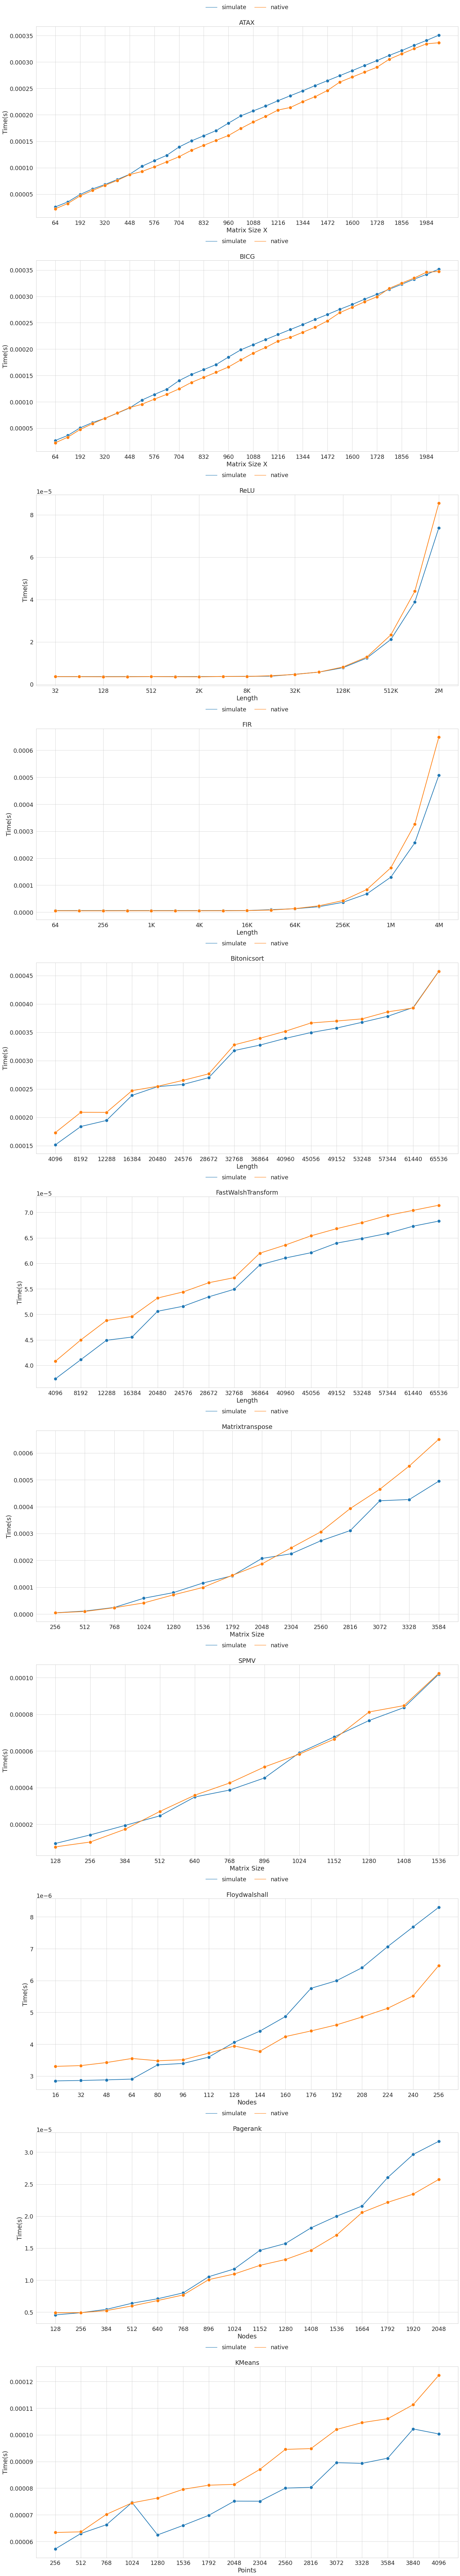

In [27]:
fig,ax=plt.subplots(11,1,figsize=(20,110))
sns.lineplot(data=atax,x='x',y='time',hue='type',ax=ax[0],
linewidth=2,marker='o',markersize=10)
x = [64 * i for i in range(1,33,2)]
ax[0].set_xticks(x)
handles, labels = ax[0].get_legend_handles_labels()
labels=['simulate', 'native']
ax[0].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[0].set_xlabel("Matrix Size X")
ax[0].set_ylabel("Time(s)")
ax[0].set_title('ATAX')

sns.lineplot(data=bicg,x='x',y='time',hue='type',ax=ax[1],
linewidth=2,marker='o',markersize=10)
x = [64 * i for i in range(1,33,2)]
ax[1].set_xticks(x)
handles, labels = ax[1].get_legend_handles_labels()
labels=['simulate', 'native']
ax[1].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[1].set_xlabel("Matrix Size X")
ax[1].set_ylabel("Time(s)")
ax[1].set_title('BICG')

sns.lineplot(data=relu,x='length',y='time',hue='type',ax=ax[2],
linewidth=2,marker='o',markersize=10)
ax[2].set_xscale('log')
#ax[2].set_yscale('log')
x = [2 ** i for i in range(5,22,2)]
ax[2].set_xticks(x)
ax[2].set_xticklabels(["32", "128", "512", "2K", "8K", "32K", "128K", "512K", "2M"])
handles, labels = ax[2].get_legend_handles_labels()
labels=['simulate', 'native']
ax[2].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[2].set_xlabel("Length")
ax[2].set_ylabel("Time(s)")
ax[2].set_title('ReLU')

sns.lineplot(data=fir,x='length',y='time',hue='type',ax=ax[3],
linewidth=2,marker='o',markersize=10)
ax[3].set_xscale('log')
#ax[2].set_yscale('log')
x = [2 ** i for i in range(6,23,2)]
ax[3].set_xticks(x)
ax[3].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[3].get_legend_handles_labels()
labels=['simulate', 'native']
ax[3].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[3].set_xlabel("Length")
ax[3].set_ylabel("Time(s)")
ax[3].set_title('FIR')

sns.lineplot(data=bs,x='length',y='time',hue='type',ax=ax[4],
linewidth=2,marker='o',markersize=10)
#ax[4].set_xscale('log')
#ax[2].set_yscale('log')
x = [i for i in range(4096, 65537, 4096)]
ax[4].set_xticks(x)
# ax[4].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[4].get_legend_handles_labels()
labels=['simulate', 'native']
ax[4].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[4].set_xlabel("Length")
ax[4].set_ylabel("Time(s)")
ax[4].set_title('Bitonicsort')

sns.lineplot(data=fw,x='length',y='time',hue='type',ax=ax[5],
linewidth=2,marker='o',markersize=10)
#ax[4].set_xscale('log')
#ax[2].set_yscale('log')
x = [i for i in range(4096, 65537, 4096)]
ax[5].set_xticks(x)
# ax[4].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[5].get_legend_handles_labels()
labels=['simulate', 'native']
ax[5].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[5].set_xlabel("Length")
ax[5].set_ylabel("Time(s)")
ax[5].set_title('FastWalshTransform')

sns.lineplot(data=mt,x='width',y='time',hue='type',ax=ax[6],
linewidth=2,marker='o',markersize=10)
#ax[4].set_xscale('log')
#ax[2].set_yscale('log')
x = [i for i in range(256, 3585,256)]
ax[6].set_xticks(x)
# ax[4].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[6].get_legend_handles_labels()
labels=['simulate', 'native']
ax[6].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[6].set_xlabel("Matrix Size")
ax[6].set_ylabel("Time(s)")
ax[6].set_title('Matrixtranspose')

sns.lineplot(data=spmv,x='dim',y='time',hue='type',ax=ax[7],
linewidth=2,marker='o',markersize=10)
#ax[4].set_xscale('log')
#ax[2].set_yscale('log')
x = [i for i in range(128, 1537,128)]
ax[7].set_xticks(x)
# ax[4].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[7].get_legend_handles_labels()
labels=['simulate', 'native']
ax[7].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[7].set_xlabel("Matrix Size")
ax[7].set_ylabel("Time(s)")
ax[7].set_title('SPMV')

sns.lineplot(data=floydwarshall,x='nodes',y='time',hue='type',ax=ax[8],
linewidth=2,marker='o',markersize=10)
#ax[4].set_xscale('log')
#ax[2].set_yscale('log')
x = [i for i in range(16, 257,16)]
ax[8].set_xticks(x)
# ax[4].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[8].get_legend_handles_labels()
labels=['simulate', 'native']
ax[8].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[8].set_xlabel("Nodes")
ax[8].set_ylabel("Time(s)")
ax[8].set_title('Floydwalshall')

sns.lineplot(data=pagerank,x='nodes',y='time',hue='type',ax=ax[9],
linewidth=2,marker='o',markersize=10)
#ax[4].set_xscale('log')
#ax[2].set_yscale('log')
x = [i for i in range(128, 2049,128)]
ax[9].set_xticks(x)
# ax[4].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[9].get_legend_handles_labels()
labels=['simulate', 'native']
ax[9].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[9].set_xlabel("Nodes")
ax[9].set_ylabel("Time(s)")
ax[9].set_title('Pagerank')

sns.lineplot(data=kmeans,x='points',y='time',hue='type',ax=ax[10],
linewidth=2,marker='o',markersize=10)
#ax[4].set_xscale('log')
#ax[2].set_yscale('log')
x = [i for i in range(256, 4097,256)]
ax[10].set_xticks(x)
# ax[4].set_xticklabels(["64", "256", "1K", "4K", "16K", "64K", "256K", "1M", "4M"])
handles, labels = ax[10].get_legend_handles_labels()
labels=['simulate', 'native']
ax[10].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=1.4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.1), loc=10, ncol=2)
ax[10].set_xlabel("Points")
ax[10].set_ylabel("Time(s)")
ax[10].set_title('KMeans')
plt.tight_layout()